In [4]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
np.random.seed(42)

In [24]:
iris_train = pd.read_csv('data/train_iris.csv', index_col=0)
iris_train.columns = iris_train.columns.str.replace(' ', '_')

In [25]:
iris_test = pd.read_csv('data/test_iris.csv', index_col=0)
iris_test.columns = iris_test.columns.str.replace(' ', '_')

In [33]:
iris_train

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [47]:
X_train = iris_train.iloc[:,0:4]
X_test = iris_test.iloc[:,0:4]

In [48]:
y_train = iris_train.species
y_test = iris_test.species

In [42]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [43]:
y_train.head()

130    2
7      0
11     0
142    2
109    2
Name: species, dtype: int64

In [44]:
max_depth_values = range(1,100)

In [49]:
scores_data = pd.DataFrame()

In [50]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({
        'max_depth':[max_depth], 
        'train_score':[train_score], 
        'test_score':[test_score], 
        'cross_val_score':[mean_cross_val_score]
    })
    scores_data = pd.concat([scores_data, temp_score_data])

In [51]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score','test_score','cross_val_score'], var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

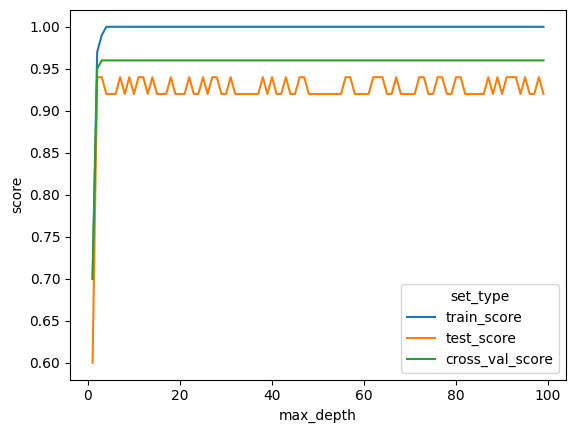

In [52]:
sns.lineplot(scores_data_long, x='max_depth', y='score', hue='set_type')